# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [94]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import bokeh as bk
%matplotlib inline

### Step 2: Read in your data set 

In [8]:
#Read in data from source 
df_raw = pd.DataFrame(pd.read_csv("../assets/admissions.csv"))
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [11]:
df_raw.shape

(400, 4)

Answer: 4 columns with 400 rows.  (1600 - nulls) unique observations

#### Question 2. Create a summary table

In [24]:
#function
df = df_raw
def summarize(df):
    return df.describe()
summarize(df)

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The scale of the gpa is much larger; therefore, there is a larger spread of possible gre scores

#### Question 4. Drop data points with missing data


In [164]:
df_clean = df_raw.dropna()
summarize(df_clean)

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: confirm the rows dropped by showing number or rows with at least one NaN value
df.isnull()
Then use the attribute .any(axis=1) to display the exact rows to be cut. In this case, we started off with 400 unique students. 3x of them had at least 1x NaN value. After removing rows (187,212,236), we're down to 397.

In [59]:
df_raw[(df_raw.isnull().any(axis=1))]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0
236,1,660.0,NaN,NaN


#### Question 6. Create box plots for GRE and GPA

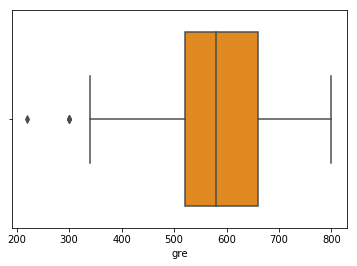

In [310]:
#boxplot 1
def find_outliers(x):
    return sns.boxplot(x,color='darkorange')
    
find_outliers(df_clean.gre);

There are 2x outlier GRE scores

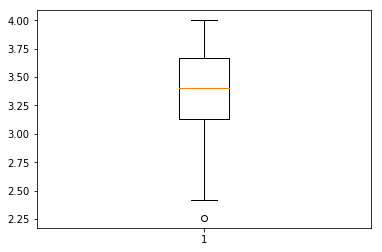

In [91]:
#boxplot 2 
find_outliers(df.gpa);

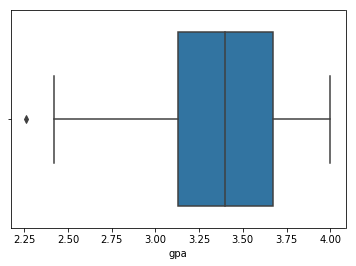

In [309]:
sns.boxplot(x=df['gpa']);

There is 1x outlier GPA.

#### Question 7. What do this plots show?

Answer:  There are 2x GRE outliers and 1x GPA outlier.

#### Question 8. Describe each distribution 

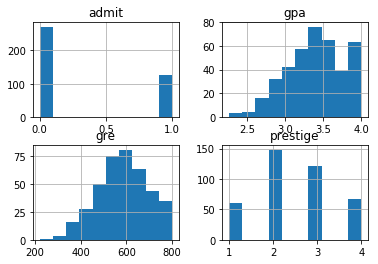

In [199]:
df_clean.hist();

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

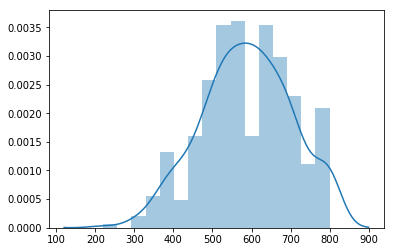

In [187]:
# plot the distribution of each variable 
def hist(x):
    return sns.distplot(x)

hist([df_clean.gre]);
summarize(df_clean.gre)


This histogram shows that GRE scores for this dataframe is left-skewed (low of 220).

count    397.000000
mean       3.392242
std        0.380208
min        2.260000
25%        3.130000
50%        3.400000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

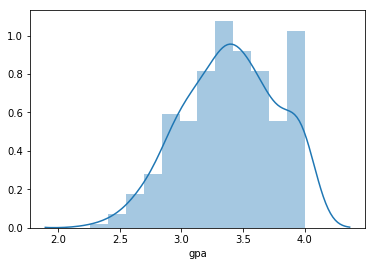

In [186]:
hist(df_clean.gpa);
summarize(df_clean.gpa)

This histogram shows that GPA for this dataframe is left-skewed with a mean of approx ~3.4 (low of 2.26)

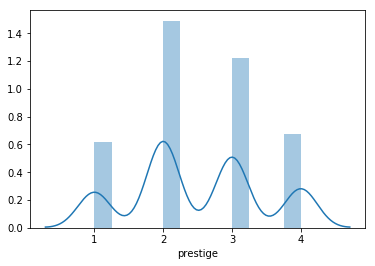

In [161]:
hist(df.prestige);

Even though these data are discrete it shows us that a higher proportion of the applicants come from a prestige level = 2

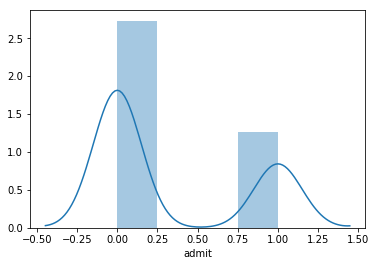

In [163]:
hist(df.admit);

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, we have more than 30 data points so we are able to use the Central Limit Theory and, more imoportantly, the data itself for gpa/gre looks like a normal distribution.; however, there are some outlying values that may ultimately affect affect the accuracy and validity of our model, but not a major concern.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Not really, but if weanted to we can remove the variables that are greater than 3x STD away from the mean. Since these values would be so much different than the population as a whole, removing them would help to further normalize our data. 

Something akin to:
outs_gpa_max = (3*(df.gpa.std()) + df.gpa.mean())
outs_gpa_min = (df.gpa.mean() - 3*(df.gpa.std()))
outs_gre_max = (3*(df.gre.std()) + df.gre.mean())
outs_gre_min = (df.gre.mean() - 3*(df.gre.std()))
df_clean_normed = df_clean[df_clean['gpa'] > outs_gpa_min]

In this case, since outliers seem to be greater than 3std away from the mean in the negative direction we'd control for those.

#### Question 11. Which of our variables are potentially colinear? 

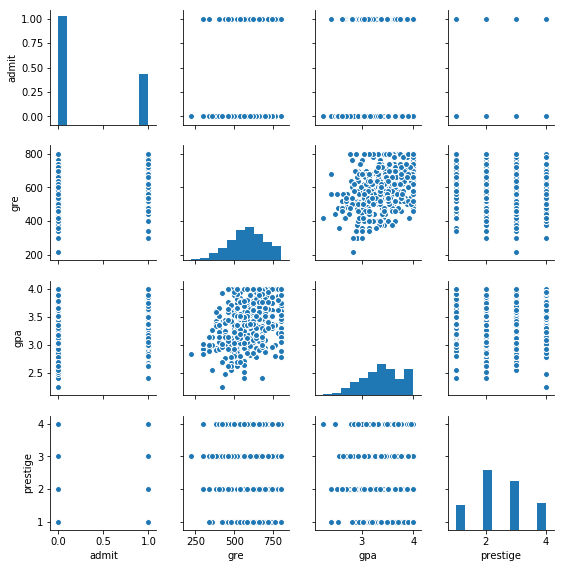

In [233]:
# create a correlation matrix for the data
sns.pairplot(df_clean,size=2,palette='darkorange',diag_kind='hist');

#### Question 12. What did you find?

Answer: It looks to be that GPA and GRE are very marginally colinear

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will investigate which independent variables have the strongest predictive value for a candidate to be admitted; GRE score, GPA, and School Prestige. It may be good to break the GPA/GRE into bins and see how the probability of admit=1 is affected across those bins.

#### Question 14. What is your hypothesis? 

Answer: Applicants with a higher GPA or GRE will have a better chance of getting admitted among peers within the same prestige level, but higher GPA/GRE in the highest prestive will have the best overall chance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data

In [304]:
#Replace Missing gre/gpa Values with mean of the cleaned dataframe
gpa_impute = df_raw['gpa'].fillna(df_clean.gpa.mean(),inplace=True)
gre_impute = df_raw['gre'].fillna(df_clean.gre.mean(),inplace=True)
prestige_impute = df_raw['prestige'].fillna(df_clean.prestige.mode())
admit_impute = df_raw.admit

#pd.concat(gpa_impute,gre_impute,prestige_impute,admit_impute)
